# *House Price Prediction - Properatti*

###  _Authors:_ 

- Pedro Terrado
- Segundo Rodriguez Parodi
- Pedro Roisman
- Thomas Gomez

### _Dataset Info_

- operation (sell)
- property_type (apartment, ph, house)
- place_name     
- place_with_parent_names 
- country_name             
- state_name               
- geonames_id (not all available)             
- lat-lon                  
- lat                   
- lon                   
- price                 
- currency (ARS, USD)             
- price_aprox_local_currency 
- price_aprox_usd            
- surface_total_in_m2        
- surface_covered_in_m2      
- price_usd_per_m2           
- price_per_m2               
- floor                      
- rooms                      
- expenses                  
- properati_url             
- description               
- title                     


#### [1 - Dataset Preparation](#section_preparacion)

#### [2 - Data Wrangling](#section_datawrangling)

#### [3 - New Features](#section_nuevasvariables)

#### [4 - Cleaning Outliers](#section_outliers)

#### [5 - Final Dataset](#section_datasetfinal)


----

# [1 - Dataset Preparation](#section_preparacion)

#### $\hspace{.5cm}$[1.1 - Import libraries and load the dataset](#seccion_import)

#### $\hspace{.5cm}$[1.2 - Description of the dataset and null values](#seccion_description)

#### $\hspace{.5cm}$[1.3 - Features selection ](#seccion_features)

## [1.1 - Import libraries and load the dataset](#seccion_import)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Reading the data and creating a DataFrame

data = pd.read_csv('../../../properatti.csv')

## [1.2 - Description of the dataset and nulls values](#seccion_description)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [4]:
round(data.isnull().sum() / data.shape[0],2)

Unnamed: 0                    0.00
operation                     0.00
property_type                 0.00
place_name                    0.00
place_with_parent_names       0.00
country_name                  0.00
state_name                    0.00
geonames_id                   0.15
lat-lon                       0.43
lat                           0.43
lon                           0.43
price                         0.17
currency                      0.17
price_aprox_local_currency    0.17
price_aprox_usd               0.17
surface_total_in_m2           0.32
surface_covered_in_m2         0.16
price_usd_per_m2              0.43
price_per_m2                  0.28
floor                         0.93
rooms                         0.61
expenses                      0.88
properati_url                 0.00
description                   0.00
title                         0.00
image_thumbnail               0.03
dtype: float64

In [5]:
data.shape

(121220, 26)

In [6]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

<AxesSubplot:title={'center':'Amount of properties by type'}, xlabel='property_type', ylabel='count'>

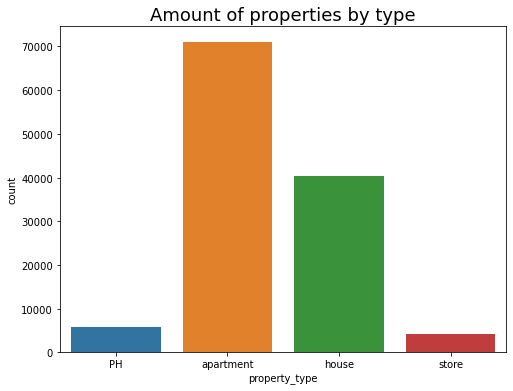

In [7]:
plt.subplots(figsize=(8,6))
plt.title('Amount of properties by type', fontsize=18)
sns.countplot(x='property_type',data=data)

## [1.3 - Features selection ](#seccion_features)

- Drop 'price' column, and 'currency' because they're already merged in 'price_aprox_usd'.
- Drop columns with a high percentage of null values.

In [8]:
data.drop(['lat-lon', 'lat', 'lon', 'floor', 'expenses', 'properati_url', 'image_thumbnail', 'Unnamed: 0', 
         'geonames_id', 'price', 'currency', 'country_name', 'price_aprox_local_currency', 'price_per_m2'], axis=1, inplace=True)

# [2 - Data Wrangling](#section_datawrangling)

#### $\hspace{.5cm}$[2.1 - Duplicated values and 'price_aprox_usd' column](#seccion_duplicated)

#### $\hspace{.5cm}$[2.2 - Work on location columns](#seccion_location)

#### $\hspace{.5cm}$[2.3 - Work on surface columns](#seccion_surface)

#### $\hspace{.5cm}$[2.4 - Create 'price_usd_per_m2' column](#seccion_pricem2)

#### $\hspace{.5cm}$[2.5 - Create 'price_usd_per_m2' column](#seccion_pricem2)

## [2.1 - Duplicated values and 'price_aprox_usd' column](#seccion_duplicated)

In [9]:
# Dropping duplicated values

print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

5410


In [10]:
print('Number of rows after drop duplicated values --->', data.shape[0])

Number of rows after drop duplicated values ---> 115810


In [11]:
print('Number of rows after cleaning --->', data.shape[0])
print('Number of columns after cleaning --->', data.shape[1])

Number of rows after cleaning ---> 115810
Number of columns after cleaning ---> 12


In [12]:
data['price_aprox_usd'].describe()

count    9.843600e+04
mean     2.408911e+05
std      3.938126e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.450000e+05
75%      2.680000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

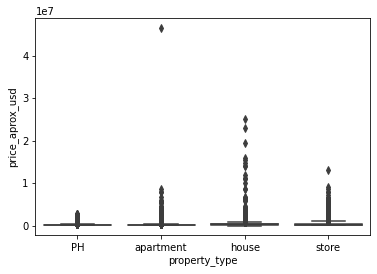

In [13]:
sns.boxplot(x='property_type', y='price_aprox_usd', data=data)

In [14]:
# Drop the values below 10.000 USD because, probably, they are users loading errors

data.drop(data[data['price_aprox_usd'] < 9000].index, axis = 0, inplace=True)
data.drop(data[data['price_aprox_usd'] > 4000000].index, axis=0, inplace=True)

<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

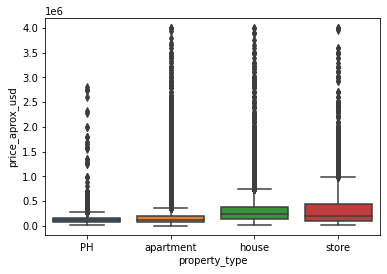

In [15]:
sns.boxplot(x='property_type', y='price_aprox_usd', data=data)

In [16]:
data.shape

(115639, 12)

## [2.2 - Work on location columns](#seccion_duplicated)

In [17]:
data.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,|Argentina|Capital Federal|Mataderos|
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,|Argentina|Capital Federal|Mataderos|
3,|Argentina|Capital Federal|Liniers|
4,|Argentina|Buenos Aires Costa Atlántica|Mar de...
5,|Argentina|Entre Ríos|Gualeguaychú|
6,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...
7,|Argentina|Capital Federal|Belgrano|
8,|Argentina|Capital Federal|Belgrano|
9,|Argentina|Santa Fe|Rosario|


In [18]:
import re

patron_regex_arg = re.compile("\|Argentina\|")
data["place_with_parent_names"] = data["place_with_parent_names"].apply(lambda x: x if x is np.NaN else patron_regex_arg.sub("",x))

In [19]:
data.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal|Mataderos|
3,Capital Federal|Liniers|
4,Buenos Aires Costa Atlántica|Mar del Plata|Cen...
5,Entre Ríos|Gualeguaychú|
6,Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7,Capital Federal|Belgrano|
8,Capital Federal|Belgrano|
9,Santa Fe|Rosario|


In [20]:
data[["state","town", "extra_info"]] = data["place_with_parent_names"].str.split("|",n=2, expand=True)
data.loc[:,["state","town", "extra_info"]]

,state,town,extra_info
0,Capital Federal,Mataderos,
1,Bs.As. G.B.A. Zona Sur,La Plata,
2,Capital Federal,Mataderos,
3,Capital Federal,Liniers,
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro|
...,...,...,...
121215,Capital Federal,Belgrano,
121216,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar|
121217,Capital Federal,Villa Urquiza,
121218,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón|


In [21]:
same_town_state = data["state"] == data["town"]
no_town = data["town"] == ""

print('Same town and state', '\n' ,same_town_state.value_counts(), '\n')
print('Properties with no town', '\n', no_town.value_counts())

Same town and state 
 False    108235
True       7404
dtype: int64 

Properties with no town 
 False    111251
True       4388
Name: town, dtype: int64


In [22]:
data.loc[same_town_state, ["state_name", "place_name", "place_with_parent_names", "state", "town", "extra_info"]]

,state_name,place_name,place_with_parent_names,state,town,extra_info
10,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
32,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
87,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
88,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
89,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
...,...,...,...,...,...,...
120690,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120966,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120971,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120979,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,


In [23]:
data.loc[no_town,['state_name', 'place_name', 'state','town', 'extra_info']]

,state_name,place_name,state,town,extra_info
108,Capital Federal,Capital Federal,Capital Federal,,None
110,Capital Federal,Capital Federal,Capital Federal,,None
115,Capital Federal,Capital Federal,Capital Federal,,None
119,Capital Federal,Capital Federal,Capital Federal,,None
121,Capital Federal,Capital Federal,Capital Federal,,None
...,...,...,...,...,...
121200,Córdoba,Córdoba,Córdoba,,None
121202,Córdoba,Córdoba,Córdoba,,None
121203,Córdoba,Córdoba,Córdoba,,None
121205,Córdoba,Córdoba,Córdoba,,None


In [24]:
print(data.shape)
data.drop(data.loc[same_town_state].index, axis=0, inplace=True)
data.drop(data.loc[no_town].index, axis=0, inplace=True)
print(data.shape)

(115639, 15)
(103847, 15)


In [25]:
data.isnull().sum()

operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
state_name                     0
price_aprox_usd            14441
surface_total_in_m2        32151
surface_covered_in_m2      15200
price_usd_per_m2           41579
rooms                      61662
description                    2
title                          0
state                          0
town                           0
extra_info                     0
dtype: int64

In [26]:
data.drop(['place_name', 'place_with_parent_names', 'state_name'], axis=1, inplace=True)

#### - Now, let's drop towns with less than 50 properties 

In [27]:
data[['state','town']].describe()

,state,town
count,103847,103847
unique,27,528
top,Capital Federal,Tigre
freq,29571,8471


In [28]:
data['state'].value_counts()

Capital Federal                 29571
Bs.As. G.B.A. Zona Norte        24427
Bs.As. G.B.A. Zona Sur          13503
Buenos Aires Costa Atlántica     9864
Bs.As. G.B.A. Zona Oeste         8947
Santa Fe                         8391
Córdoba                          2764
Buenos Aires Interior            2143
Río Negro                         780
Corrientes                        570
Tucumán                           559
Mendoza                           426
Neuquén                           422
Misiones                          361
Entre Ríos                        355
Chubut                            240
San Luis                          163
La Pampa                          150
Chaco                              56
Salta                              35
Tierra Del Fuego                   25
Jujuy                              25
San Juan                           24
Catamarca                          24
Santa Cruz                         20
Santiago Del Estero                 1
La Rioja    

In [29]:
towns = pd.value_counts(data['town']).to_frame().reset_index()
towns = towns.rename(columns={"index":"town", "town":"amount of properties"})
towns.head(10)

mask_towns = towns['amount of properties'] < 100
towns_drop = towns[mask_towns]

In [30]:
list_town_drop = list(towns_drop['town'])
list_town_drop

['Cushamen',
 'Tribunales',
 'Roldán',
 'Santo Tomé',
 'Marcos Paz',
 'Coronel Suárez',
 'Villa Ortuzar',
 'San Rafael',
 'Santa Rosa',
 'Mendiolaza',
 'Lobos',
 'Mar de Ajó',
 'Tres Arroyos',
 'Monte Castro',
 'Tandil',
 'Funes',
 'San Martín de los Andes',
 'Esperanza',
 'Monte Hermoso',
 'Rafaela',
 'Parque Centenario',
 'Pompeya',
 'Chascomús',
 'Río Cuarto',
 'Lácar',
 'General Pico',
 'Santa Rosa de Calamuchita',
 'Godoy Cruz',
 'Coronda',
 'Villa Santa Rita',
 'Cariló',
 'Parque Avellaneda',
 'Versalles',
 'Mburucuyá',
 'Valeria del Mar',
 'Mar de las Pampas',
 'San Clemente del Tuyú',
 'Capitán Bermúdez',
 'Cañuelas',
 'Villa General Mitre',
 'Trenque Lauquen',
 'Santa Teresita',
 'Luján de Cuyo',
 'Florencio Varela',
 'Escalante',
 'Parque Chas',
 'San Pedro',
 'Villa La Angostura',
 'Agronomía',
 'Velez Sarsfield',
 'Resistencia',
 'Villa Real',
 'Río Ceballos',
 'Reconquista',
 'Brandsen',
 'Granadero Baigorria',
 'Unquillo',
 'San Miguel del Monte',
 'Mar Azul',
 'Trelew',


In [31]:
data['town'].isnull().sum()

0

In [32]:
data['town'] = data['town'].apply(lambda x: np.NaN if x in list_town_drop else x)

data.dropna(subset=["town"],inplace=True)

In [33]:
data['town'].isnull().sum()

0

## [2.3 - Work on surface columns](#seccion_duplicated)

In [34]:
data.groupby('property_type')['surface_total_in_m2'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3050.0,118.537049,89.008297,0.0,64.0,95.0,146.00,1200.0
apartment,42859.0,80.862433,355.303362,0.0,42.0,59.0,88.00,49800.0
house,20444.0,441.262131,1022.726600,0.0,183.0,275.0,454.00,50000.0
store,2154.0,390.020427,1152.610322,0.0,56.0,150.0,349.75,25186.0


In [35]:
data.groupby('property_type')['surface_covered_in_m2'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4205.0,88.550059,147.425348,1.0,53.0,75.0,105.00,6610.0
apartment,50479.0,74.644347,870.953112,0.0,40.0,52.0,77.00,187000.0
house,27332.0,218.925948,417.063707,1.0,120.0,182.0,260.00,38240.0
store,2512.0,353.646895,1320.599034,1.0,40.0,110.0,287.25,35000.0


In [36]:
print('Null values in surface_total_in_m2:', data['surface_total_in_m2'].isnull().sum())
print('Null values in surface_covered_in_m2:', data['surface_covered_in_m2'].isnull().sum())

Null values in surface_total_in_m2: 29740
Null values in surface_covered_in_m2: 13719


In [37]:
zeros_surface_total = data['surface_total_in_m2'] == 0
zeros_surface_total.value_counts()

False    97892
True       355
Name: surface_total_in_m2, dtype: int64

In [38]:
zeros_surface_covered = data['surface_covered_in_m2'] == 0
zeros_surface_covered.value_counts()

False    98245
True         2
Name: surface_covered_in_m2, dtype: int64

In [39]:
data['surface_total_zeros'] = data['surface_total_in_m2'].fillna(0)
data['surface_covered_zeros'] = data['surface_covered_in_m2'].fillna(0)

In [40]:
# We're going to assign 1 to data with value in 'surface_total_in_m2' but without in 'surface_covered_in_m2'

covered_vs_total = data.apply(lambda x : 1 if x['surface_total_zeros']!= 0 and x['surface_covered_zeros'] == 0 else 0, axis=1)
covered_vs_total.value_counts()

0    92949
1     5298
dtype: int64

In [41]:
# Here, we're going to assign 1 to data with values in 'surface_covered_zeros' and without values in 'surface_total_zeros'  

covered_vs_total_1 = data.apply(lambda x : 1 if x['surface_total_zeros']== 0 and x['surface_covered_zeros'] != 0 else 0, axis=1)
covered_vs_total_1.value_counts()

0    76575
1    21672
dtype: int64

#### - Let's create a ratio to calculate m2 total divided by m2 covered by each property type. 
#### - After that, we're going to complete the data with this ratio.
#### - However, we need to take care of the outliers first, don't want to skew the ratio, right?

In [42]:
print(data['surface_total_zeros'].describe(), '\n')

count    98247.000000
mean       139.327287
std        574.285313
min          0.000000
25%          0.000000
50%         53.000000
75%        130.000000
max      50000.000000
Name: surface_total_zeros, dtype: float64 



In [43]:
data['surface_total_zeros'] = data['surface_total_zeros'].apply(lambda x: np.NaN if (x < 20) | (x > 800) else x)

In [44]:
print(data['surface_total_zeros'].isnull().sum())
print(data['surface_total_zeros'].notnull().sum())

32706
65541


In [45]:
print(data['surface_total_zeros'].isnull().sum())

32706


<AxesSubplot:xlabel='property_type', ylabel='surface_total_zeros'>

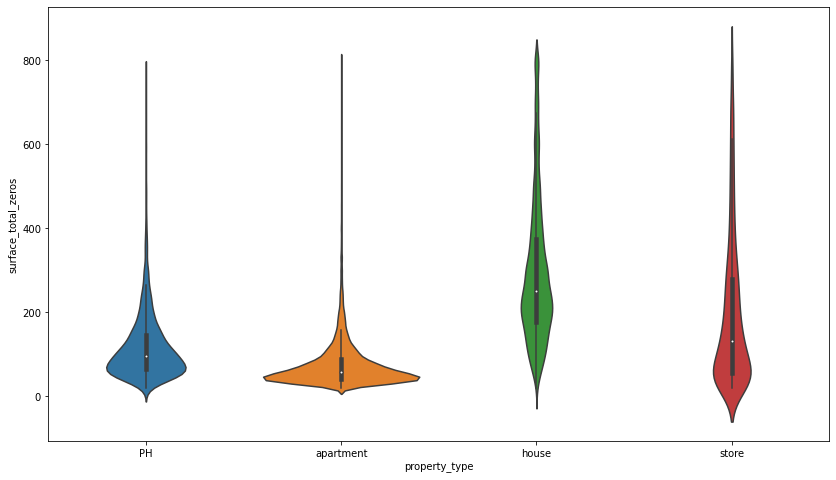

In [46]:
plt.subplots(figsize=(14, 8))
sns.violinplot(data=data, x='property_type', y='surface_total_zeros')

(0.0, 3000.0)

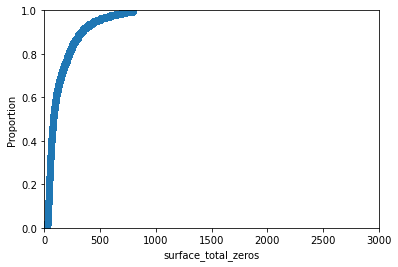

In [47]:
sns.ecdfplot(data["surface_total_zeros"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])

(0.0, 40.0)

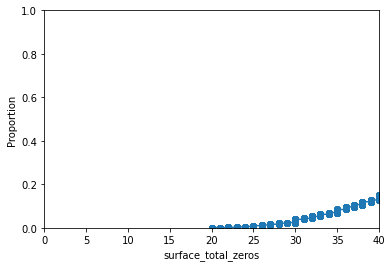

In [48]:
sns.ecdfplot(data["surface_total_zeros"], marker="o")
plt.ylim([0,1])
plt.xlim([0,40])

In [49]:
print(data['surface_covered_zeros'].describe(), '\n')

count     98247.000000
mean        112.088613
std         700.570908
min           0.000000
25%          36.000000
50%          63.000000
75%         131.000000
max      187000.000000
Name: surface_covered_zeros, dtype: float64 



In [50]:
data['surface_covered_zeros'] = data['surface_covered_zeros'].apply(lambda x: np.NaN if (x < 20) | (x > 1000) else x)

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_zeros'>

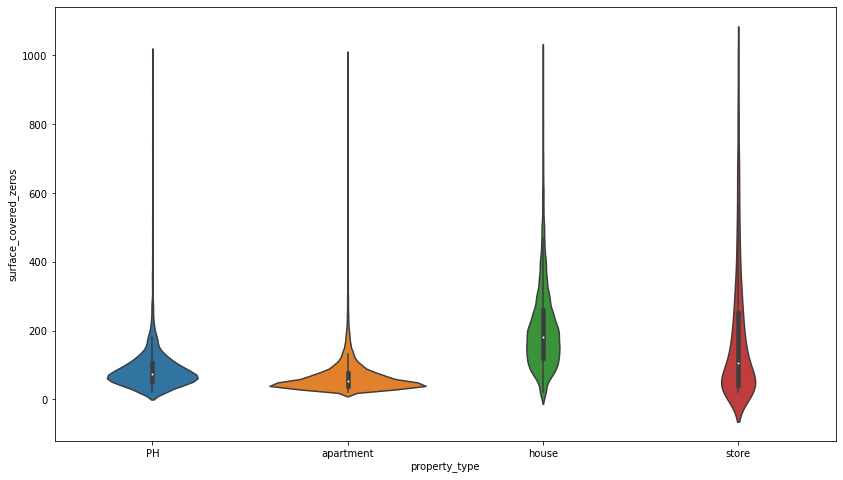

In [51]:
plt.subplots(figsize=(14, 8))
sns.violinplot(data=data, x='property_type', y='surface_covered_zeros')

(0.0, 3000.0)

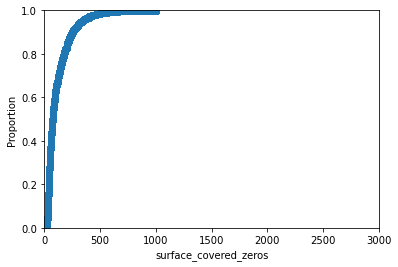

In [52]:
sns.ecdfplot(data["surface_covered_zeros"], marker="o")
plt.ylim([0,1])
plt.xlim([0,3000])

(0.0, 40.0)

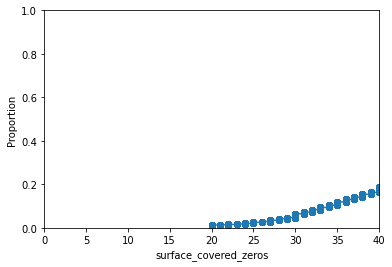

In [53]:
sns.ecdfplot(data["surface_covered_zeros"], marker="o")
plt.ylim([0,1])
plt.xlim([0,40])

In [54]:
# Ok, so let's create a function to calculate the mean between total and covered surface based on property_type

def average_in(prop):
    property_type = data['property_type'] == prop
    average_type = data[property_type]
    average = average_type.apply(lambda x : np.nan if x['surface_total_zeros'] == 0 or x['surface_covered_zeros'] == 0 
                                 else x['surface_total_zeros']/x['surface_covered_zeros'], axis = 1)
    return average.mean()

ap = 'apartment'
ho = 'house'
ph = 'PH'
st = 'store'

ratio_ap = average_in(ap)
ratio_ho = average_in(ho)
ratio_ph = average_in(ph)
ratio_st = average_in(st)

print('Ratio Apartment:', ratio_ap)
print('Ratio House:', ratio_ho)
print('Ratio PH:', ratio_ph)
print('Ratio Store:', ratio_st)

Ratio Apartment: 1.1615778419714242
Ratio House: 1.650915834505112
Ratio PH: 1.3384571013486974
Ratio Store: 1.1200549200795291


In [55]:
print(data['surface_total_zeros'].isnull().sum())

32706


In [56]:
print(data['surface_covered_zeros'].isnull().sum())

14531


In [57]:
data['surface_total_zeros'].fillna(0, axis=0, inplace=True)
data['surface_covered_zeros'].fillna(0, axis=0, inplace=True)

In [58]:
data[data['surface_total_zeros'] == 0].shape

(32706, 14)

In [59]:
data[data['surface_covered_zeros'] == 0].shape

(14531, 14)

In [60]:
# Let's fill in the data with zero in surface_total_in_m2 but with de data in surface_covered by property_type 'apartment'. 

total_ap = data.apply(lambda x: (x['surface_covered_zeros']*ratio_ap) if x['surface_total_zeros']==0 and x['surface_covered_zeros']!=0 
                                           and x['property_type'] == ap else 0, axis=1) 

apartment_total = total_ap + data['surface_total_zeros']

apartment_total.value_counts()

0.000000      21557
40.000000      1466
50.000000      1340
60.000000      1161
45.000000      1151
              ...  
355.442820        1
657.000000        1
763.000000        1
423.975912        1
347.311775        1
Length: 1067, dtype: int64

In [61]:
covered_ap = data.apply(lambda x: (x['surface_total_zeros']/ratio_ap) if x['surface_covered_zeros'] == 0 and x['surface_total_zeros'] != 0 
                                    and x['property_type'] == ap else 0, axis=1)

apartment_covered = covered_ap + data['surface_covered_zeros'] 

apartment_covered.value_counts()

0.000000      11037
40.000000      2153
50.000000      1821
45.000000      1627
60.000000      1565
              ...  
892.000000        1
591.000000        1
910.000000        1
121.386613        1
792.000000        1
Length: 950, dtype: int64

In [62]:
total_ho = data.apply(lambda x : (x['surface_covered_zeros']*ratio_ho) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                   and x['property_type'] == ho else 0, axis=1)

house_total = total_ho + data['surface_total_zeros']

house_total.value_counts()

0.000000       22445
40.000000       1466
50.000000       1340
60.000000       1161
45.000000       1151
               ...  
604.235195         1
780.883190         1
1221.677718        1
848.570739         1
1124.273683        1
Length: 1364, dtype: int64

In [63]:
covered_ho = data.apply(lambda x : (x['surface_total_zeros']/ratio_ho) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0 
                                    and x['property_type'] == ho else 0, axis=1)

house_covered = covered_ho + data['surface_covered_zeros']

house_covered.value_counts()

0.000000      13270
40.000000      2153
50.000000      1821
45.000000      1627
60.000000      1565
              ...  
682.000000        1
970.000000        1
108.424667        1
945.000000        1
356.165946        1
Length: 1051, dtype: int64

In [64]:
total_ph = data.apply(lambda x : (x['surface_covered_zeros']*ratio_ph) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                  and x['property_type'] == ph else 0, axis=1)

ph_total = total_ph + data['surface_total_zeros']

ph_total.value_counts()

0.000000       31351
40.000000       1466
50.000000       1340
60.000000       1161
45.000000       1151
               ...  
266.352963         1
599.000000         1
1338.457101        1
347.998846         1
285.091363         1
Length: 934, dtype: int64

In [65]:
covered_ph = data.apply(lambda x : (x['surface_total_zeros']/ratio_ph) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0 
                                     and x['property_type'] == ph else 0, axis=1)

ph_covered = covered_ph + data['surface_covered_zeros']

ph_covered.value_counts()

0.000000      14310
40.000000      2153
50.000000      1821
45.000000      1627
60.000000      1565
              ...  
970.000000        1
863.000000        1
499.000000        1
805.000000        1
76.954278         1
Length: 824, dtype: int64

In [66]:
total_st = data.apply(lambda x : (x['surface_covered_zeros']*ratio_st) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                    and x['property_type'] == st else 0, axis=1)

store_total = total_st + data['surface_total_zeros']

store_total.value_counts()

0.000000      32001
40.000000      1466
50.000000      1340
60.000000      1161
45.000000      1151
              ...  
198.249721        1
215.050545        1
554.427185        1
299.054664        1
786.278554        1
Length: 970, dtype: int64

In [67]:
covered_st = data.apply(lambda x : (x['surface_total_zeros']/ratio_st) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0
                                    and x['property_type'] == st else 0, axis=1)

store_covered = covered_st + data['surface_covered_zeros']

store_covered.value_counts()


0.000000      14212
40.000000      2153
50.000000      1821
45.000000      1627
60.000000      1565
              ...  
50.890362         1
967.000000        1
688.000000        1
334.805011        1
891.000000        1
Length: 879, dtype: int64

In [68]:
# Create new columns with the filled data 

data['surface_covered_m2'] = covered_st + covered_ph + covered_ho + covered_ap + data['surface_covered_zeros']

data['surface_total_m2'] = total_st + total_ph + total_ho + total_ap + data['surface_total_zeros']

In [69]:
covered_zeros_final = data['surface_covered_m2'] == 0
covered_zeros_final.value_counts()

False    89011
True      9236
Name: surface_covered_m2, dtype: int64

In [70]:
total_zeros_final = data['surface_total_m2'] == 0
total_zeros_final.value_counts()

False    89011
True      9236
Name: surface_total_m2, dtype: int64

In [71]:
data['surface_covered_m2'] = data['surface_covered_m2'].replace([0,'0'], np.NaN)
data['surface_total_m2'] = data['surface_total_m2'].replace([0,'0'], np.NaN)

In [72]:
print(data['surface_total_m2'].isnull().sum())
print(data['surface_covered_m2'].isnull().sum())

data.drop(['surface_total_zeros', 'surface_covered_zeros', 'surface_total_in_m2', 'surface_covered_in_m2', 'operation'], axis=1, inplace=True)

9236
9236


In [73]:
data.shape

(98247, 11)

#### - We're going to create a unique price_usd_m2 column (price_aprox_usd / surface_total_m2), to do that, we need to complete the column surface_total_m2 as much as we can! 
#### - Let's do some RegEx to extract information from the description column (free text) to complete the surface_total_m2 column.  

In [74]:
meters_value_pattern = '(?P<value_mts>\d{0,4} ?)(?P<meters>m2|mts|mt|mts2|mt2)'
meter_regex_pattern = re.compile(meters_value_pattern, re.IGNORECASE)

meters_value_match = data["description"].apply(lambda x:x if x is np.NaN else meter_regex_pattern.search(x).group("value_mts") if meter_regex_pattern.search(x)!=None else np.NaN)

data['meters_description'] = meters_value_match
data['meters_description'].unique()

array([nan, '106 ', '40 ', ..., '1073 ', '697 ', '803 '], dtype=object)

- #### Replacing null values from 'surface_total_zeros' with the data obtained from 'meters_description' column 

In [75]:
data["surface_total_m2"] = data["surface_total_m2"].fillna(data["meters_description"])

print(data["surface_total_m2"].isnull().sum())

6528


- #### Convert data to float and replace " " for NaN values

In [76]:
data['surface_total_m2'] = data['surface_total_m2'].replace([" ",'',' ',""], np.NaN)

print(data['surface_total_m2'].isna().sum())

pd.to_numeric(data['surface_total_m2'])

data['surface_total_m2'].value_counts()

6632


40.0                  1466
50.0                  1340
60.0                  1161
45.0                  1151
30.0                   992
                      ... 
1040                     1
51.52252632365834        1
180.3288421328042        1
504.12478341559813       1
249                      1
Name: surface_total_m2, Length: 2727, dtype: int64

In [77]:
data.shape

(98247, 12)

- #### Drop null rows in 'surface_total_m2'

In [78]:
data.dropna(subset=['surface_total_m2'], inplace=True)
data.shape

(91615, 12)

- #### Drop null rows in 'surface_covered_m2'

In [79]:
data.dropna(subset=['surface_covered_m2'], inplace=True)
data.shape

(89011, 12)

In [80]:
pd.set_option("display.max_colwidth",50)

In [81]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

## [2.4 - Create 'price_usd_per_m2' column](#seccion_pricem2)

In [82]:
round(data.groupby('property_type')['price_usd_per_m2'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,2951.0,1452.26,1050.78,36.60,995.21,1326.53,1783.77,30000.00
apartment,37704.0,2759.64,3019.04,1.57,1760.00,2237.19,2850.00,104486.11
house,17341.0,1217.22,1163.48,3.00,592.35,1122.99,1580.86,38000.00
store,1619.0,2324.28,2448.76,39.95,1071.43,1750.00,2836.88,57382.08


In [83]:
data["price_aprox_usd"] = data["price_aprox_usd"].astype(float)
data["surface_total_m2"] = data["surface_total_m2"].astype(float)

In [84]:
data["price_usd_m2"] = (data["price_aprox_usd"] / data["surface_total_m2"])
data["price_usd_m2"]

0         1127.272727
2         1309.090909
4         1828.571429
6         1226.415094
7         3066.666667
             ...     
121214            NaN
121215    7699.115044
121216    1383.333333
121217    2858.695652
121218    1997.916667
Name: price_usd_m2, Length: 89011, dtype: float64

In [85]:
# Create a mask to see np.inf
mask_inf = data["price_usd_m2"] == np.inf
data[mask_inf]

,property_type,price_aprox_usd,price_usd_per_m2,rooms,description,title,state,town,extra_info,surface_covered_m2,surface_total_m2,meters_description,price_usd_m2


In [86]:
data.replace([np.inf,-np.inf], np.nan, inplace=True)

In [87]:
data.dropna(axis=0, subset=['price_usd_m2'], inplace=True)

# [3 - New Features](#section_features)

#### $\hspace{.5cm}$[3.1 - Create 'repair' column](#seccion_repair)

#### $\hspace{.5cm}$[3.2 - Create 'pool' column](#seccion_pool)

#### $\hspace{.5cm}$[3.3 - Create 'amenities'](#seccion_amenities)

#### $\hspace{.5cm}$[3.4 - Create 'garage' column](#seccion_garage)

#### $\hspace{.5cm}$[3.5 - Create 'financing' column](#seccion_financing)

#### $\hspace{.5cm}$[3.6 - Create 'rooms' column](#seccion_rooms)

#### $\hspace{.5cm}$[3.7 - Create 'bedrooms' column](#seccion_bedrooms)

## [3.1 - Create 'repair' column](#seccion_repair)

In [88]:
pd.options.mode.chained_assignment = None  # default='warn'

In [89]:
# We're going to look for the word 'repair' in 'description' feature, because could affect the price of the property.

data['repair'] = data['description'].str.contains(r'(?i)refac')

print(data[['description','repair']].head())

                                         description repair
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   True
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...  False
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  False
6  MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  False
7  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...  False


In [90]:
data_repair_column =  data.apply(lambda x: 0 if x['repair'] == False else 1, axis=1)

print(data_repair_column.value_counts())

data["repair"] = data_repair_column

0    78094
1     1397
dtype: int64


<AxesSubplot:title={'center':'Repair Column'}, xlabel='repair', ylabel='count'>

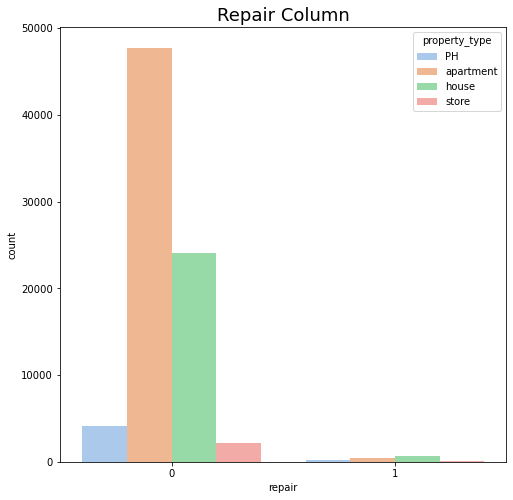

In [91]:
plt.subplots(figsize=(8,8))
plt.title('Repair Column', fontsize=18)
sns.countplot(x='repair', hue='property_type', data=data, palette='pastel')

## [3.2 - Create 'pool' column](#seccion_pool)

In [92]:
data["pool"] = data["description"].str.contains(r'(?i)pileta|piscina|pisina|picina')

print(data[["description","pool"]])

                                              description   pool
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...  False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...  False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  False
7       EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   True
...                                                   ...    ...
121160  Edificio en esquina de muy buena categoría de ...  False
121215  TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...   True
121216  Excelente e impecable casa en Venta en Las Lom...   True
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...  False
121218  2 Amb al contrafrente,  luminoso. El departame...  False

[79491 rows x 2 columns]


In [93]:
data_pool_column = data.apply(lambda x: 0 if x['pool'] == False else 1, axis=1)

data['pool'] = data_pool_column

data['pool'].value_counts()

0    56471
1    23020
Name: pool, dtype: int64

<AxesSubplot:title={'center':'Pool Column'}, xlabel='pool', ylabel='count'>

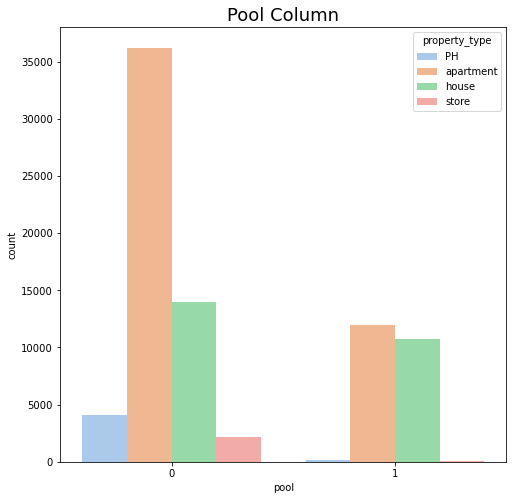

In [94]:
plt.subplots(figsize=(8,8))
plt.title('Pool Column', fontsize=18)
sns.countplot(x='pool', hue='property_type', data=data, palette='pastel')

## [3.3 - Create 'amenities' column](#seccion_amenities)

In [95]:
data['amenities'] = data['description'].str.contains(r'(?i)amenities')

data[['description', 'amenities']]

,description,amenities
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",False
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,False
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,False
6,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,False
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,False
...,...,...
121160,Edificio en esquina de muy buena categoría de ...,False
121215,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,False
121216,Excelente e impecable casa en Venta en Las Lom...,False
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,True


In [96]:
data_amenities_column = data.apply(lambda x: 0 if x['amenities'] == False else 1, axis=1)

data['amenities'] = data_amenities_column

data['amenities'].value_counts()

0    71729
1     7762
Name: amenities, dtype: int64

<AxesSubplot:title={'center':'Amenities Column'}, xlabel='amenities', ylabel='count'>

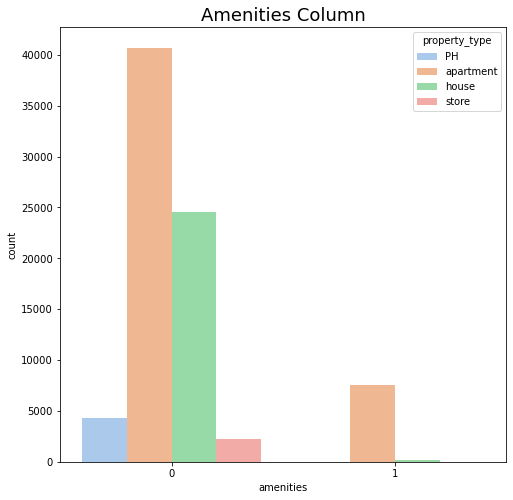

In [97]:
plt.subplots(figsize=(8,8))
plt.title('Amenities Column', fontsize=18)
sns.countplot(x='amenities', hue='property_type', data=data, palette='pastel')

## [3.4 - Create 'garage' column](#seccion_garage)

In [98]:
data['garage'] = data['description'].str.contains(r'(?i)garage|cochera|estacionamiento')

data_garage_column = data.apply(lambda x: 0 if x['garage'] == False else 1, axis=1)

data['garage'] = data_garage_column

data['garage'].value_counts()

0    44070
1    35421
Name: garage, dtype: int64

<AxesSubplot:title={'center':'Garage Column'}, xlabel='garage', ylabel='count'>

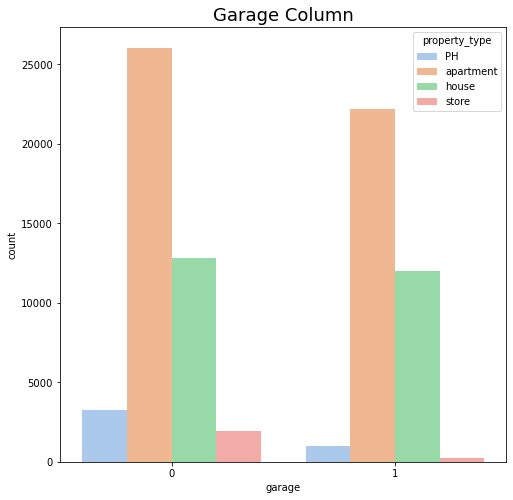

In [99]:
plt.subplots(figsize=(8,8))
plt.title('Garage Column', fontsize=18)
sns.countplot(x='garage', hue='property_type', data=data, palette='pastel')

## [3.5 - Create 'financing' column](#seccion_financing)

In [100]:
data['financing'] = data['description'].str.contains(r'(?i)cuotas|financiacion|pozo|credito|cuota')

data_financing_column = data.apply(lambda x: 0 if x['financing'] == False else 1, axis=1)

data['financing'] = data_financing_column

data['financing'].value_counts()

0    66612
1    12879
Name: financing, dtype: int64

<AxesSubplot:title={'center':'Financing Column'}, xlabel='financing', ylabel='count'>

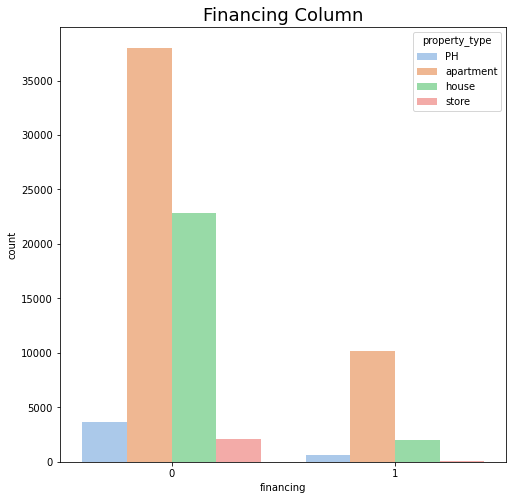

In [101]:
plt.subplots(figsize=(8,8))
plt.title('Financing Column', fontsize=18)
sns.countplot(x='financing', hue='property_type', data=data, palette='pastel')

## [3.6 - Create 'rooms' column](#seccion_rooms)

In [102]:
print(data['rooms'].value_counts())
print('\n')
print(data['rooms'].isnull().sum())

2.0     9099
3.0     8673
4.0     5646
1.0     5514
5.0     2541
6.0      847
7.0      407
8.0      158
10.0      83
9.0       65
11.0      19
12.0      18
15.0       4
14.0       4
17.0       3
22.0       3
25.0       3
13.0       3
20.0       1
16.0       1
18.0       1
32.0       1
19.0       1
Name: rooms, dtype: int64


46396


In [103]:
# Number of rooms could be a number or a string, let's check on both. 

data['description'] = data['description'].astype(str)
data['title'] = data['title'].astype(str)

In [104]:
def search_pattern(pattern, column, new_column):
    
    regex_pattern = re.compile(pattern, re.IGNORECASE)
    match = data[column].apply(lambda x: x if x is np.NaN else regex_pattern.search(x).group("numero") if regex_pattern.search(x)!=None else np.NaN)
    data.insert(4, new_column, match)

In [105]:
# Doing some Regex! 

rooms_number = "(?P<numero>\d\d?) ?(ambientes|ambiente|amb)"
rooms_str = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(ambientes|ambiente|amb)"


search_pattern(rooms_number, "description", "room_number_description")
search_pattern(rooms_str, "description", "room_str_description")
search_pattern(rooms_number, "title", "room_number_title")
search_pattern(rooms_str, "title", "room_str_title")

In [106]:
data['room_str_description'] = data['room_str_description'].astype(str)
data['room_str_title'] = data['room_str_title'].astype(str)

In [107]:
# Replacing some strings for numbers

dictionary = {"mono":1,"MONO":1,"Mono":1, "un":1, "UN":1,"Un":1,"dos":2,"DOS":2,"Dos":2,"tres":3,"TRES":3,"Tres":3,"cuatro":4,"CUATRO":4,"Cuatro":4,"cinco":5,"Cinco":5,"CINCO":5,"seis":6, "Seis":6,"SEIS":6,"siete":7,"SIETE":7,"ocho":8,"OCHO":8,"nueve":9,"NUEVE":9,"diez":10,"DIEZ":10}

data["room_str_description"].replace(dictionary,inplace=True ) 

data["room_str_title"].replace(dictionary, inplace=True)

In [108]:
data['room_str_description'] = data['room_str_description'].astype(float)
data['room_str_title'] = data['room_str_title'].astype(float)
data['room_number_description'] = data['room_number_description'].astype(float)
data['room_number_title'] = data['room_number_title'].astype(float)

In [109]:
mask_no_rooms = data['rooms'].isnull()
data.loc[mask_no_rooms,["room_number_description","room_str_description","room_number_title","room_str_title"]]

,room_number_description,room_str_description,room_number_title,room_str_title
0,2.0,NaN,2.0,NaN
2,2.0,NaN,2.0,NaN
4,NaN,NaN,2.0,NaN
6,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,1.0
...,...,...,...,...
121160,NaN,NaN,NaN,NaN
121215,NaN,NaN,3.0,NaN
121216,NaN,NaN,NaN,NaN
121217,NaN,1.0,NaN,NaN


In [110]:
print('Room Number Description: ', data["room_number_description"].notnull().sum())
print('Room String Description: ', data["room_str_description"].notnull().sum())
print('Room Number Title: ', data["room_number_title"].notnull().sum())
print('Room String title: ', data["room_str_title"].notnull().sum())

print('The amount of nulls in Rooms is:', data['rooms'].isnull().sum())

Room Number Description:  30670
Room String Description:  10878
Room Number Title:  18851
Room String title:  4624
The amount of nulls in Rooms is: 46396


In [111]:
# Filling the null values in "rooms" with the data extracted from the description

data["rooms"].fillna(data["room_number_description"], inplace=True)
data["rooms"].fillna(data["room_str_description"], inplace=True)
data["rooms"].fillna(data["room_number_title"], inplace=True)
data["rooms"].fillna(data["room_str_title"], inplace=True)

print('The amount of nulls in Rooms, afeter filling it is:', data['rooms'].isnull().sum())

The amount of nulls in Rooms, afeter filling it is: 24455


In [112]:
# The amount of nulls after filling is weird, let's check the values

print(data['rooms'].value_counts())

2.0     15571
3.0     14731
1.0      9623
4.0      9297
5.0      3661
6.0      1182
7.0       527
8.0       178
10.0       89
9.0        77
11.0       27
12.0       20
0.0        12
14.0        6
15.0        5
17.0        4
13.0        3
22.0        3
25.0        3
16.0        2
24.0        2
20.0        2
50.0        2
72.0        2
32.0        1
19.0        1
73.0        1
23.0        1
74.0        1
36.0        1
18.0        1
Name: rooms, dtype: int64


In [113]:
data['rooms'] = data['rooms'].replace('nan', np.NaN)

In [114]:
# The amount of nulls after filling is weird, let's check the values

print(data['rooms'].value_counts())

2.0     15571
3.0     14731
1.0      9623
4.0      9297
5.0      3661
6.0      1182
7.0       527
8.0       178
10.0       89
9.0        77
11.0       27
12.0       20
0.0        12
14.0        6
15.0        5
17.0        4
13.0        3
22.0        3
25.0        3
16.0        2
24.0        2
20.0        2
50.0        2
72.0        2
32.0        1
19.0        1
73.0        1
23.0        1
74.0        1
36.0        1
18.0        1
Name: rooms, dtype: int64


In [115]:
print('The amount of nulls in Rooms, afeter filling it is:', data['rooms'].isnull().sum())

The amount of nulls in Rooms, afeter filling it is: 24455


## [3.7 - Create 'bedrooms' column](#seccion_bedrooms)

In [116]:
bedroom_number = "(?P<numero>\d\d?) ?(dorm|cuarto)"
bedroom_str = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(dorm|cuarto)"

search_pattern(bedroom_number, "description", "bedroom_number")
search_pattern(bedroom_str, "description", "bedroom_str")

In [117]:
data.loc[mask_no_rooms,["bedroom_number","bedroom_str"]]

,bedroom_number,bedroom_str
0,NaN,NaN
2,NaN,NaN
4,1,NaN
6,NaN,DOS
7,NaN,NaN
...,...,...
121160,NaN,NaN
121215,2,NaN
121216,3,NaN
121217,NaN,NaN


In [118]:
data["bedroom_str"] = data["bedroom_str"].str.lower()
dictionary_str = {"un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data["bedroom_str"] = data["bedroom_str"].replace(dictionary_str)

In [119]:
data['bedroom_number'] = data['bedroom_number'].replace('nan', np.NaN)  

In [120]:
data.loc[mask_no_rooms,["rooms","bedroom_number","bedroom_str"]]

,rooms,bedroom_number,bedroom_str
0,2.0,NaN,NaN
2,2.0,NaN,NaN
4,2.0,1,NaN
6,NaN,NaN,2.0
7,1.0,NaN,NaN
...,...,...,...
121160,NaN,NaN,NaN
121215,3.0,2,NaN
121216,NaN,3,NaN
121217,1.0,NaN,NaN


In [121]:
data['bedroom_number'].fillna(data['bedroom_str'], axis=0, inplace=True)

print(data['bedroom_number'].isnull().sum())
print(data['bedroom_str'].isnull().sum())

42338
64720


In [122]:
data['rooms'].isnull().sum()

24455

In [123]:
data['rooms'].fillna(data['bedroom_number'], axis=0, inplace=True)

data['rooms'].isnull().sum()

9578

#### * Keep working on 'rooms' column

In [124]:
# Clean the column description

regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
pattern = re.compile(regex)
data["description_clean"] = data["description"].apply(lambda x: pattern.sub("", x))

In [125]:
# Let's look for some keywords for the column 'rooms'

data["kitchen_diningroom"] = data["description_clean"].str.contains(r'cocina comedor?') #cocina comedor
data["living_diningroom"] = data["description_clean"].str.contains(r'living comedor?') #living comedor
data["kitchen"] = data["description_clean"].str.contains(r'cocina?') #cocina unica
data["living"] = data["description_clean"].str.contains(r'living?') #living unico
data["diningroom"] = data["description_clean"].str.contains(r'comedor?') #comedor unico

In [126]:
# Creating dummy variables for the data that we found in 'description'

data["kitchen_diningroom"] =  data["kitchen_diningroom"].apply(lambda x: 0 if x == False else 1)
data["living_diningroom"] =  data["living_diningroom"].apply(lambda x: 0 if x == False else 1)
data["kitchen"] =  data["kitchen"].apply(lambda x: 0 if x == False else 1)
data["living"] =  data["living"].apply(lambda x: 0 if x == False else 1)
data["diningroom"] =  data["diningroom"].apply(lambda x: 0 if x == False else 1)

In [127]:
data.loc[mask_no_rooms,["kitchen_diningroom","living_diningroom", "kitchen", "living", "diningroom"]]

,kitchen_diningroom,living_diningroom,kitchen,living,diningroom
0,0,0,0,0,0
2,0,0,0,0,0
4,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
...,...,...,...,...,...
121160,0,1,1,1,1
121215,0,0,0,0,1
121216,0,1,1,1,1
121217,0,0,0,0,0


In [128]:
data["kitchen_diningroom"] = data["kitchen_diningroom"].astype(float)
data["living_diningroom"] = data["living_diningroom"].astype(float)
data["kitchen"] = data["kitchen"].astype(float)
data["living"] = data["living"].astype(float)
data["diningroom"] = data["diningroom"].astype(float)

In [129]:
# Let's sum the quantity of rooms and add it to 'room_sum' column

columns_list = ["kitchen_diningroom", "living_diningroom","kitchen", "living", "diningroom"]
columns_list
data["room_total"] = data[columns_list].sum(axis=1)
data.loc[mask_no_rooms,["rooms","kitchen_diningroom", "living_diningroom","kitchen", "living", "diningroom","room_total"]].sample(15)

,rooms,kitchen_diningroom,living_diningroom,kitchen,living,diningroom,room_total
54592,1,0.0,0.0,0.0,0.0,0.0,0.0
15687,4,0.0,1.0,0.0,1.0,1.0,3.0
93129,1,1.0,0.0,1.0,0.0,1.0,3.0
56193,3,0.0,0.0,1.0,1.0,1.0,3.0
105840,2,0.0,0.0,0.0,1.0,1.0,2.0
56382,4,0.0,0.0,0.0,0.0,0.0,0.0
110585,2,0.0,0.0,0.0,0.0,0.0,0.0
8450,1,0.0,0.0,0.0,0.0,0.0,0.0
71426,3,1.0,0.0,1.0,0.0,1.0,3.0
20651,4,0.0,1.0,1.0,1.0,1.0,4.0


In [130]:
# Logical conditions to complete the column 'rooms_total':
# For example: Add 1 room if the property hasn't a kitchen  

data["room_total"] = data.apply(lambda x: x.room_total + 1 if (x.bedroom_number != 0) and (x.kitchen_diningroom == 0) and (x.kitchen == 0) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.bedroom_number != 0) and (x.kitchen_diningroom == 1) and (x.kitchen == 1) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.bedroom_number == 0) and (x.living_diningroom == 1) and (x.living == 1) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.kitchen_diningroom == 1) and (x.diningroom == 1) else  x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.living_diningroom == 1) and (x.living == 1) else x.room_total, axis=1)

In [131]:
data["rooms_total"] = data["room_total"].replace(0, np.NaN)
data["rooms_total"] = data["room_total"].replace('nan', np.NaN)

data.loc[mask_no_rooms,["rooms","room_number_description","kitchen_diningroom","living_diningroom","kitchen","living","diningroom","rooms_total"]].head(20)

,rooms,room_number_description,kitchen_diningroom,living_diningroom,kitchen,living,diningroom,rooms_total
0,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,NaN,0.0,0.0,0.0,0.0,0.0,1.0
6,2,NaN,0.0,0.0,0.0,0.0,0.0,1.0
7,1,NaN,0.0,0.0,0.0,0.0,0.0,1.0
8,2,NaN,0.0,0.0,0.0,0.0,0.0,1.0
12,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0
15,3,NaN,0.0,1.0,1.0,1.0,1.0,3.0
18,3,NaN,0.0,0.0,0.0,0.0,1.0,2.0
22,3,NaN,0.0,0.0,1.0,1.0,0.0,2.0


In [132]:
data["rooms"].fillna(data["rooms_total"], axis=0, inplace=True)

print(data["rooms"].isnull().sum())

0


In [133]:
data.columns

Index(['property_type', 'price_aprox_usd', 'price_usd_per_m2', 'rooms',
       'bedroom_str', 'bedroom_number', 'room_str_title', 'room_number_title',
       'room_str_description', 'room_number_description', 'description',
       'title', 'state', 'town', 'extra_info', 'surface_covered_m2',
       'surface_total_m2', 'meters_description', 'price_usd_m2', 'repair',
       'pool', 'amenities', 'garage', 'financing', 'description_clean',
       'kitchen_diningroom', 'living_diningroom', 'kitchen', 'living',
       'diningroom', 'room_total', 'rooms_total'],
      dtype='object')

In [134]:
data.drop(['living_diningroom', 'kitchen', 'living', 'diningroom','price_usd_per_m2', 'description_clean', 'meters_description','bedroom_str','bedroom_number', 'room_str_title', 'room_number_title', 'room_str_description', 'room_number_description', 'kitchen_diningroom', 'room_total', 'rooms_total'], axis=1, inplace = True)

In [135]:
data["rooms"].value_counts()

2.0     19982
1.0     17414
3.0     17234
4.0      9505
5.0      3684
        ...  
73.0        1
18.0        1
19.0        1
23.0        1
74.0        1
Name: rooms, Length: 61, dtype: int64

In [136]:
data['rooms'] = data['rooms'].astype(int)

# [4 - Outliers](#section_outliers)

#### $\hspace{.5cm}$[4.1 - Analyze outliers 'price_usd_m2' column](#seccion_outliers)

#### $\hspace{.5cm}$[4.2 - Drop 'apartment' outliers](#seccion_apartment)

#### $\hspace{.5cm}$[4.3 - Drop 'PH' outliers](#seccion_ph)

#### $\hspace{.5cm}$[4.4 - Drop 'house' outliers](#seccion_house)

#### $\hspace{.5cm}$[4.5 - Drop 'store' outliers](#seccion_store)

## [4.1 - Analyze outliers from 'price_usd_m2' column](#seccion_outliers)

In [137]:
data['property_type'].value_counts()

apartment    48209
house        24783
PH            4285
store         2214
Name: property_type, dtype: int64

In [138]:
data.shape

(79491, 16)

In [139]:
data.drop(data[data['price_usd_m2'] > 8000].index, axis=0, inplace=True)

<AxesSubplot:xlabel='property_type', ylabel='price_usd_m2'>

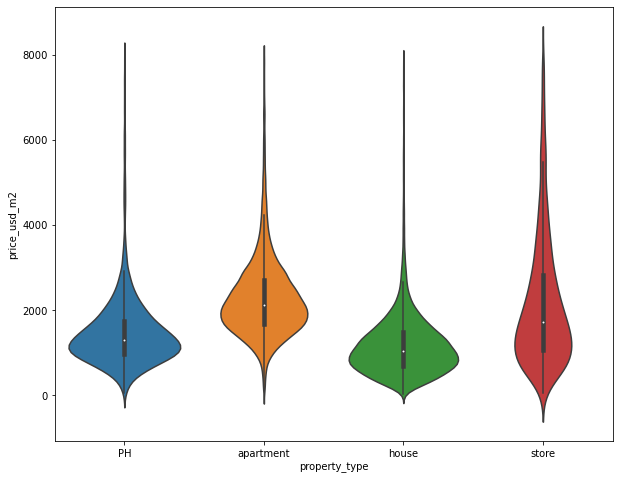

In [140]:
plt.subplots(figsize=(10,8))
sns.violinplot(x='property_type', y='price_usd_m2', data=data)

## [4.2 - Drop outliers from 'apartment' property_type](#seccion_ap)

In [141]:
# Drop all values above 4000

price_apartment_m2_drop = (data['price_usd_m2'] > 4000) & (data['property_type'] == 'apartment')
data.drop(data.loc[price_apartment_m2_drop].index, axis = 0, inplace=True)

print(price_apartment_m2_drop.sum())

2395


## [4.3 - Drop outliers from 'PH' property_type](#seccion_ph)

In [142]:
price_PH_m2_drop = (data['price_usd_m2'] > 3500) & (data['property_type'] == 'PH')
data.drop(data.loc[price_PH_m2_drop].index, axis=0, inplace=True)

print(price_PH_m2_drop.sum())

110


## [4.4 - Drop outliers from 'house' property_type](#seccion_house)

In [143]:
price_house_m2_drop = (data['price_usd_m2'] > 3000) & (data['property_type'] == 'house')
data.drop(data.loc[price_house_m2_drop].index, axis=0, inplace=True)

print(price_house_m2_drop.sum())

627


## [4.5 - Drop outliers from 'store' property_type](#seccion_store)

In [144]:
price_store_m2_drop = (data['price_usd_m2'] > 6000) & (data['property_type'] == 'store')
data.drop(data.loc[price_store_m2_drop].index, axis=0, inplace=True)

print(price_store_m2_drop.sum())

68


(0.0, 1.0)

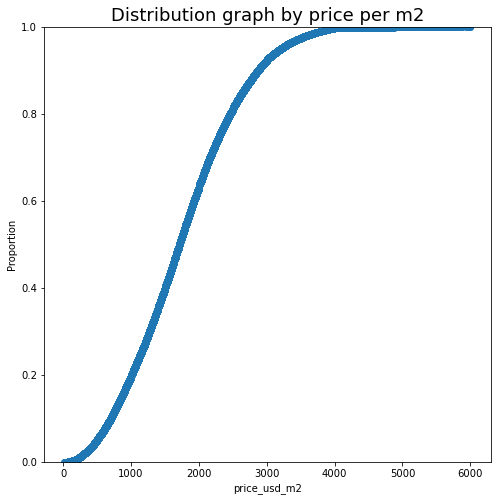

In [145]:
plt.subplots(figsize=(8,8))
plt.title('Distribution graph by price per m2', fontsize=18)
sns.ecdfplot(data["price_usd_m2"], marker="o")
plt.ylim([0,1])

<AxesSubplot:title={'center':'Price per m2 grouped by property type'}, xlabel='property_type', ylabel='price_usd_m2'>

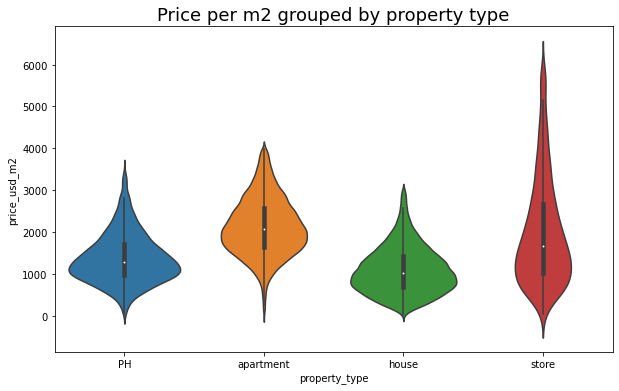

In [146]:
plt.subplots(figsize=(10,6))
plt.title('Price per m2 grouped by property type', fontsize=18)
sns.violinplot(x='property_type', y='price_usd_m2', data=data)

<AxesSubplot:title={'center':'Price m2 Distribuition'}, xlabel='price_usd_m2', ylabel='Count'>

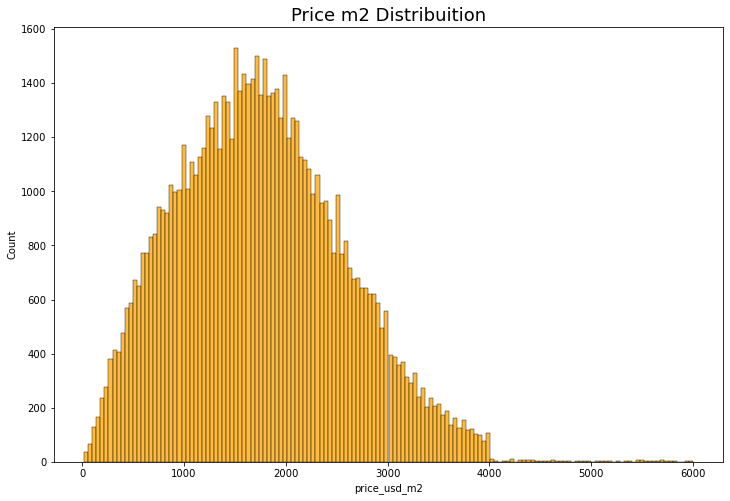

In [147]:
plt.subplots(figsize=(12,8))
plt.title('Price m2 Distribuition', fontsize=18)
sns.histplot(data['price_usd_m2'], color = "orange", bins = 150)

<AxesSubplot:title={'center':'Amount of rooms by property type'}, xlabel='rooms', ylabel='count'>

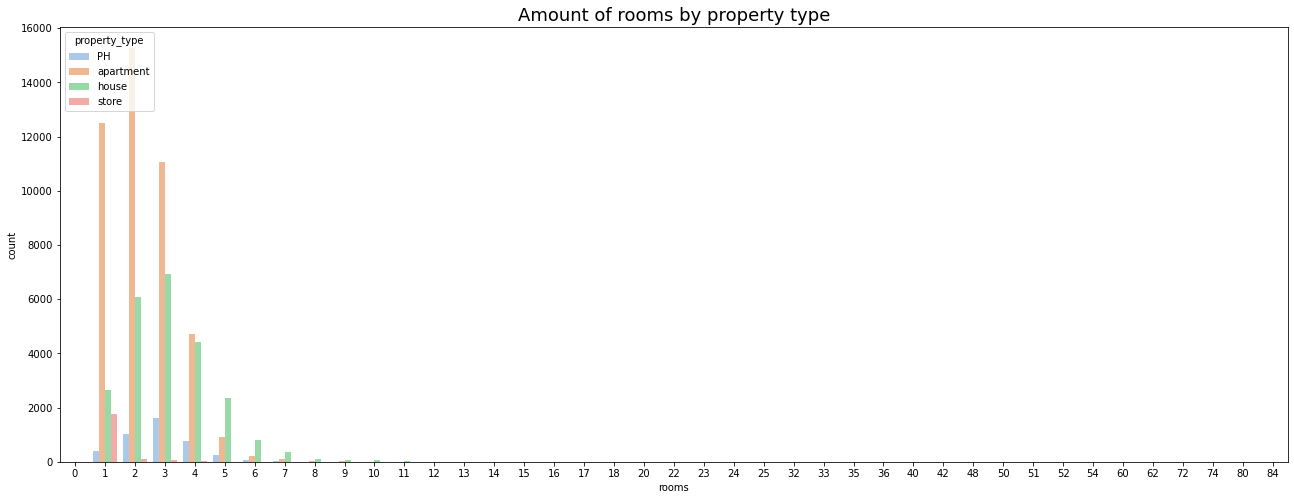

In [148]:
plt.subplots(figsize=(22,8))
plt.title('Amount of rooms by property type', fontsize=18)
sns.countplot(x='rooms', hue='property_type', data=data, palette='pastel')

# [5 - Data Final](#section_final)

In [1]:
data.columns

NameError: name 'data' is not defined

#### This is the final dataset, with this dataset we're going to develop our ML Model! :)

In [149]:
data.head(3)

,property_type,price_aprox_usd,rooms,description,title,state,town,extra_info,surface_covered_m2,surface_total_m2,price_usd_m2,repair,pool,amenities,garage,financing
0,PH,62000.0,2,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,,40.0,55.0,1127.272727,1,0,0,0,1
2,apartment,72000.0,2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,,55.0,55.0,1309.090909,0,0,0,0,0
4,apartment,64000.0,2,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|,35.0,35.0,1828.571429,0,0,0,0,0


In [150]:
data.isnull().sum()

property_type         0
price_aprox_usd       0
rooms                 0
description           0
title                 0
state                 0
town                  0
extra_info            0
surface_covered_m2    0
surface_total_m2      0
price_usd_m2          0
repair                0
pool                  0
amenities             0
garage                0
financing             0
dtype: int64

In [151]:
data.to_csv('/home/thomas/ThomasFold/Proyectos_DS/HousePricePrediction/data_prop.csv')